In [1]:
%run ../src/start.py


python	3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
---------------------
Versions:
----------------------
pandas      1.1.2
numpy       1.19.1
matplotlib  3.3.1
seaborn     0.11.0
plotly      4.11.0
----------------------


Loaded Libraries
-------------------
import pandas as pd
import numpy as np
import sys,os
import re
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
----------------


GLOBAL VARIABLES
--------------------------
HERE_DIR: list current directory path
RAW_DIR: list files in `data\raw` directory
INTER_DIR: list files in `data\interim` directory
FINAL_DIR: list files in `data\final` directory
SRC_DIR: list files in `src\` directory
------------------------------

# SAVE PLOTS
To save a plot call
`save_plots(fig_variable,'name_of_plot')`

source file: src/start.py




In [2]:
ls ../data/raw/crime_data/2016/csv

apr16.xlsx*  dec16.xlsx*  jan16.xlsx*  jun16.xlsx*  may16.xlsx*  oct16.xlsx*
aug16.xlsx*  feb16.xlsx*  jul16.xlsx*  mar16.xlsx*  nov16.xlsx*  sep16.xlsx*


In [3]:
path = '2016/csv'
raw_directory = os.path.join('..','data','raw','crime_data',f'{path}/')

In [4]:
all_files = glob.glob(os.path.join(raw_directory, "*.xlsx")) # change "*.xlsx" for excel files
df_from_each_file = (pd.read_excel(f, engine='openpyxl') for f in all_files)    # change to `pd.read_excel(f)` for excel files
df   = pd.concat(df_from_each_file, ignore_index=True)     # combine into one large dataframe

# cleanup columns
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('\n','_').str.strip()
# df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [5]:
df.head()

,date,hour,offense_type,beat,premise,blockrange,streetname,type,suffix,._offenses
0,2016-04-10,20,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1
1,2016-04-11,19,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2
2,2016-04-12,20,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,-,1
3,2016-04-13,2,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,-,1
4,2016-04-14,3,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,-,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          122693 non-null  datetime64[ns]
 1   hour          122693 non-null  int64         
 2   offense_type  122693 non-null  object        
 3   beat          122693 non-null  object        
 4   premise       121293 non-null  object        
 5   blockrange    122693 non-null  object        
 6   streetname    122693 non-null  object        
 7   type          122693 non-null  object        
 8   suffix        122693 non-null  object        
 9   ._offenses    122693 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.4+ MB


# Show null data

In [7]:
df.apply(lambda x: sum(x.isnull()))

date               0
hour               0
offense_type       0
beat               0
premise         1400
blockrange         0
streetname         0
type               0
suffix             0
._offenses         0
dtype: int64

In [8]:
# create null percentage of column as dataframe
null_per_df = pd.DataFrame(df.isna().mean().round(4) * 100)
# rename columns
null_per_df.rename(columns={'index': 'col_name', 0: 'null_percent'}, inplace=True)

# filter data <20% null values
per_filter = null_per_df.null_percent<=90
null_per_df[per_filter].sort_values(by='null_percent',ascending=False)

,null_percent
premise,1.14
date,0.00
hour,0.00
offense_type,0.00
beat,0.00
blockrange,0.00
streetname,0.00
type,0.00
suffix,0.00
._offenses,0.00


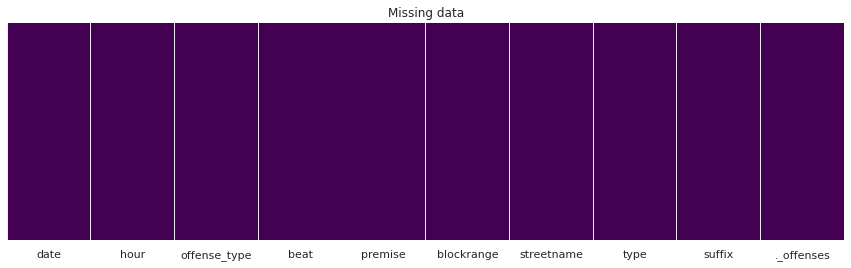

In [9]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [10]:
df.columns.tolist()

['date',
 'hour',
 'offense_type',
 'beat',
 'premise',
 'blockrange',
 'streetname',
 'type',
 'suffix',
 '._offenses']

In [11]:
# # combine columns into a new one
# df['offenses'] = pd.concat([df['. Of Offenses'].dropna(),
#                               df['. of Offenses'].dropna()]).reindex_like(df)

# # drop columns
# df = df.drop(['. Of Offenses','. of Offenses', 'Field11',
#  'Field12',
#  'Field13'], axis = 1)

In [ ]:
# df = df.drop([  'field11',
#  'field2',
#  'field12',
#  'field13',
#  'field14'], axis = 1)

In [12]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('\n','_').str.strip()

In [13]:
df.apply(lambda x: sum(x.isnull()))

date               0
hour               0
offense_type       0
beat               0
premise         1400
blockrange         0
streetname         0
type               0
suffix             0
._offenses         0
dtype: int64

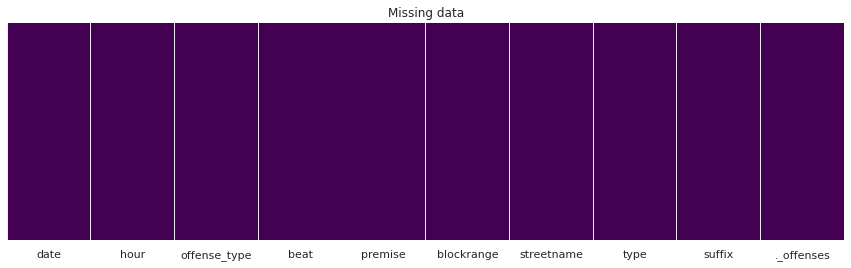

In [14]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [ ]:
df.head()

In [ ]:
df.info()

## Combine date & hour to one column

In [ ]:
df[['date','hour']]

In [15]:
# convert two columns into one datetime
df['date_time'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['hour'], unit='h')

# drop columns
df = df.drop(['date','hour'], axis = 1)

In [16]:
df.head()

,offense_type,beat,premise,blockrange,streetname,type,suffix,._offenses,date_time
0,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1,2016-04-10 20:00:00
1,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2,2016-04-11 19:00:00
2,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,-,1,2016-04-12 20:00:00
3,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,-,1,2016-04-13 02:00:00
4,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,-,1,2016-04-14 03:00:00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   offense_type  122693 non-null  object        
 1   beat          122693 non-null  object        
 2   premise       121293 non-null  object        
 3   blockrange    122693 non-null  object        
 4   streetname    122693 non-null  object        
 5   type          122693 non-null  object        
 6   suffix        122693 non-null  object        
 7   ._offenses    122693 non-null  int64         
 8   date_time     122693 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 8.4+ MB


In [18]:
#change column name

df.rename(columns={
    '._offenses': 'offenses',
}, inplace=True)

# convert offenses to int

df['offenses'] = df['offenses'].astype('int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   offense_type  122693 non-null  object        
 1   beat          122693 non-null  object        
 2   premise       121293 non-null  object        
 3   blockrange    122693 non-null  object        
 4   streetname    122693 non-null  object        
 5   type          122693 non-null  object        
 6   suffix        122693 non-null  object        
 7   offenses      122693 non-null  int64         
 8   date_time     122693 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 8.4+ MB


In [ ]:
df.date_time

# Inspect evry column

In [ ]:
def create_new_cell(contents):
    '''created new jupyter cells by inputing a list of columns
    outputs'''
    from IPython.core.getipython import get_ipython
    shell = get_ipython()
    payload = dict(
        source='set_next_input',
        #text=f'#column:{contents}\ndf.{contents}.value_counts(dropna=False)[:10]'.format(contents),
        text=f'# column:{contents}\ndf.{contents}.value_counts(dropna=False)[:10]',
        replace=False,)
    shell.payload_manager.write_payload(payload, single=False)

    
def strip_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.strip()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))    
    
def lower_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.lower()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))       
    
    
    
def capital_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.capitalize()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))      

In [ ]:
col_list = df.columns.tolist()
col_list

In [ ]:
for col in col_list:
    create_new_cell(col)

In [ ]:
# column:date_time
df.date_time.value_counts(dropna=False)[:10]

In [ ]:
# column:offenses
df.offenses.value_counts(dropna=False)[:10]

In [ ]:
# column:suffix
df.suffix.value_counts(dropna=False)[:10]

In [ ]:
# column:type
df.type.value_counts(dropna=False)[:10]

In [ ]:
# column:streetname
df.streetname.value_counts(dropna=False)[:10]

In [ ]:
# column:blockrange
df.blockrange.value_counts(dropna=False)[:10]

In [ ]:
# column:premise
df.premise.value_counts(dropna=False)[:10]

In [ ]:
# column:beat
df.beat.value_counts(dropna=False)[:10]

In [ ]:
# column:offense_type
df.offense_type.value_counts(dropna=False)[:10]

In [21]:
df

,offense_type,beat,premise,blockrange,streetname,type,suffix,offenses,date_time
0,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1,2016-04-10 20:00:00
1,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2,2016-04-11 19:00:00
2,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,-,1,2016-04-12 20:00:00
3,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,-,1,2016-04-13 02:00:00
4,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,-,1,2016-04-14 03:00:00
...,...,...,...,...,...,...,...,...,...
122688,Theft,UNK,Other Parking Lot,7900-7999,FM 1960,RD,-,1,2016-09-14 14:00:00
122689,Auto Theft,UNK,"Other, Unknown, or Not Listed",700-799,RICHCREST,DR,-,1,2016-09-14 16:00:00
122690,Theft,UNK,Hotel or Motel Parking Lot,8300-8399,FM 1960,RD,-,1,2016-09-13 20:00:00
122691,Theft,UNK,Construction Site,17100-17199,EASTEX,FWY,-,1,2016-09-13 07:00:00


In [24]:
df.rename(columns={'blockrange': 'block_range', 'streetname': 'street_name'}, inplace=True)

col_ord =['date_time','offenses','offense_type', 'block_range', 'street_name', 'type', 'suffix','beat', 'premise']
df = df[col_ord]



file = 'crime_2016.csv'
directory_save = os.path.join('..','data','interim',f'{file}')
df.to_csv(directory_save,index=False)

In [23]:
df

,date_time,offenses,offense_type,block_range,street_name,type,suffix,beat,premise
0,2016-04-10 20:00:00,1,Robbery,4000-4099,MILBY,-,-,10H10,"Road, Street, or Sidewalk"
1,2016-04-11 19:00:00,2,Aggravated Assault,400-499,YORK,-,-,10H10,"Road, Street, or Sidewalk"
2,2016-04-12 20:00:00,1,Robbery,1900-1999,RUNNELS,-,-,10H10,Apartment
3,2016-04-13 02:00:00,1,Auto Theft,100-199,SIDNEY,-,-,10H10,Driveway
4,2016-04-14 03:00:00,1,Burglary,3300-3399,CANAL,ST,-,10H10,Service or Gas Station
...,...,...,...,...,...,...,...,...,...
122688,2016-09-14 14:00:00,1,Theft,7900-7999,FM 1960,RD,-,UNK,Other Parking Lot
122689,2016-09-14 16:00:00,1,Auto Theft,700-799,RICHCREST,DR,-,UNK,"Other, Unknown, or Not Listed"
122690,2016-09-13 20:00:00,1,Theft,8300-8399,FM 1960,RD,-,UNK,Hotel or Motel Parking Lot
122691,2016-09-13 07:00:00,1,Theft,17100-17199,EASTEX,FWY,-,UNK,Construction Site
